In [42]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point

In [4]:
tornado_df = pd.read_csv('./Historical_Tornado_Tracks.csv',parse_dates=['date'])

In [5]:
tornado_df.head()

,OBJECTID,om,yr,mo,dy,date,time,tz,st,stf,...,closs,slat,slon,elat,elon,len,wid,fc,Pre_1996_Loss,Shape__Length
0,1,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,...,0,38.77,-90.22,38.83,-90.03,9.5,150,0,6,22821.104315
1,2,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,...,0,39.10,-89.30,39.12,-89.23,3.6,130,0,5,8303.844488
2,3,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,...,0,40.88,-84.58,0.00,0.00,0.1,10,0,4,18.798152
3,4,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,...,0,34.40,-94.37,0.00,0.00,0.6,17,0,3,17.197183
4,5,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,...,0,37.60,-90.68,37.63,-90.65,2.3,300,0,5,5378.394660


Get the min and max of the latitudes and longitudes

In [7]:
tornado_df.slat.min()

18.13

In [8]:
BBox = (tornado_df.slon.min(), tornado_df.slon.max(), tornado_df.slat.min(), tornado_df.slat.max())

In [9]:
BBox

(-163.53, -64.9, 18.13, 61.02)

In [10]:
us_map = plt.imread('./us_map.png')

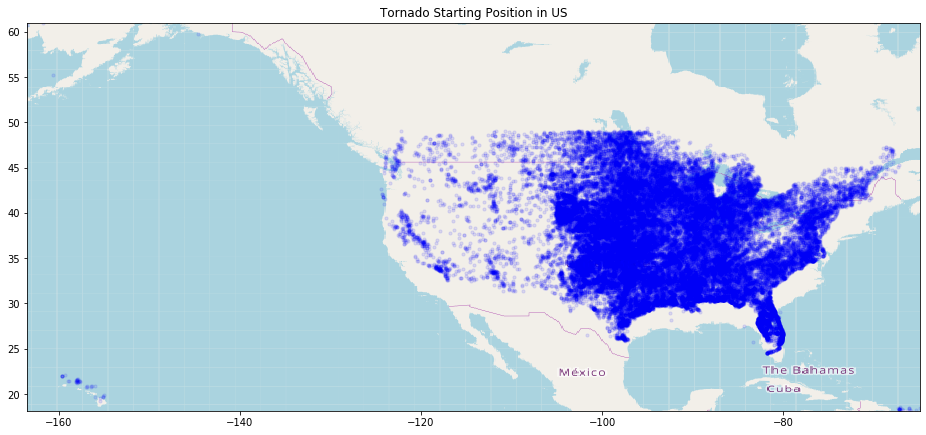

In [14]:
fig, ax = plt.subplots(figsize = (16,14))
ax.scatter(tornado_df.slon, tornado_df.slat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Tornado Starting Position in US')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(us_map, zorder=0, extent = BBox, aspect= 'equal')

In [16]:
import geopandas

In [17]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [24]:
world.dtypes

pop_est          int64
continent       object
name            object
iso_a3          object
gdp_md_est     float64
geometry      geometry
dtype: object

In [26]:
world.name.head()

0                        Fiji
1                    Tanzania
2                   W. Sahara
3                      Canada
4    United States of America
Name: name, dtype: object

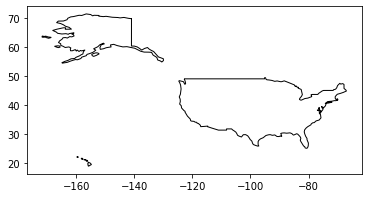

In [67]:
ax = world[world.name == 'United States of America'].plot(color='white', edgecolor='black')

In [35]:
gdf = geopandas.GeoDataFrame(tornado_df.head(), geometry=geopandas.points_from_xy(tornado_df.head().slon, tornado_df.head().slat))

In [36]:
gdf

,OBJECTID,om,yr,mo,dy,date,time,tz,st,stf,...,slat,slon,elat,elon,len,wid,fc,Pre_1996_Loss,Shape__Length,geometry
0,1,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,...,38.77,-90.22,38.83,-90.03,9.5,150,0,6,22821.104315,POINT (-90.22000 38.77000)
1,2,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,...,39.10,-89.30,39.12,-89.23,3.6,130,0,5,8303.844488,POINT (-89.30000 39.10000)
2,3,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,...,40.88,-84.58,0.00,0.00,0.1,10,0,4,18.798152,POINT (-84.58000 40.88000)
3,4,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,...,34.40,-94.37,0.00,0.00,0.6,17,0,3,17.197183,POINT (-94.37000 34.40000)
4,5,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,...,37.60,-90.68,37.63,-90.65,2.3,300,0,5,5378.394660,POINT (-90.68000 37.60000)


In [68]:
plt.figure(figsize=((16,14)))
gdf.plot(ax=ax, color='red')
plt.show()

<Figure size 1152x1008 with 0 Axes>

In [45]:
usa = geopandas.read_file("./gz_2010_us_040_00_5m.json")
usa.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


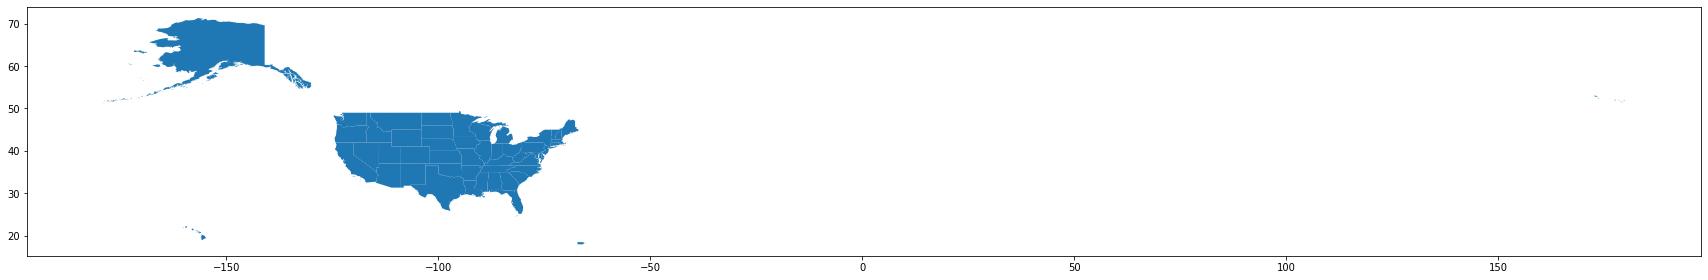

In [51]:
usa.plot(figsize=(30,20))

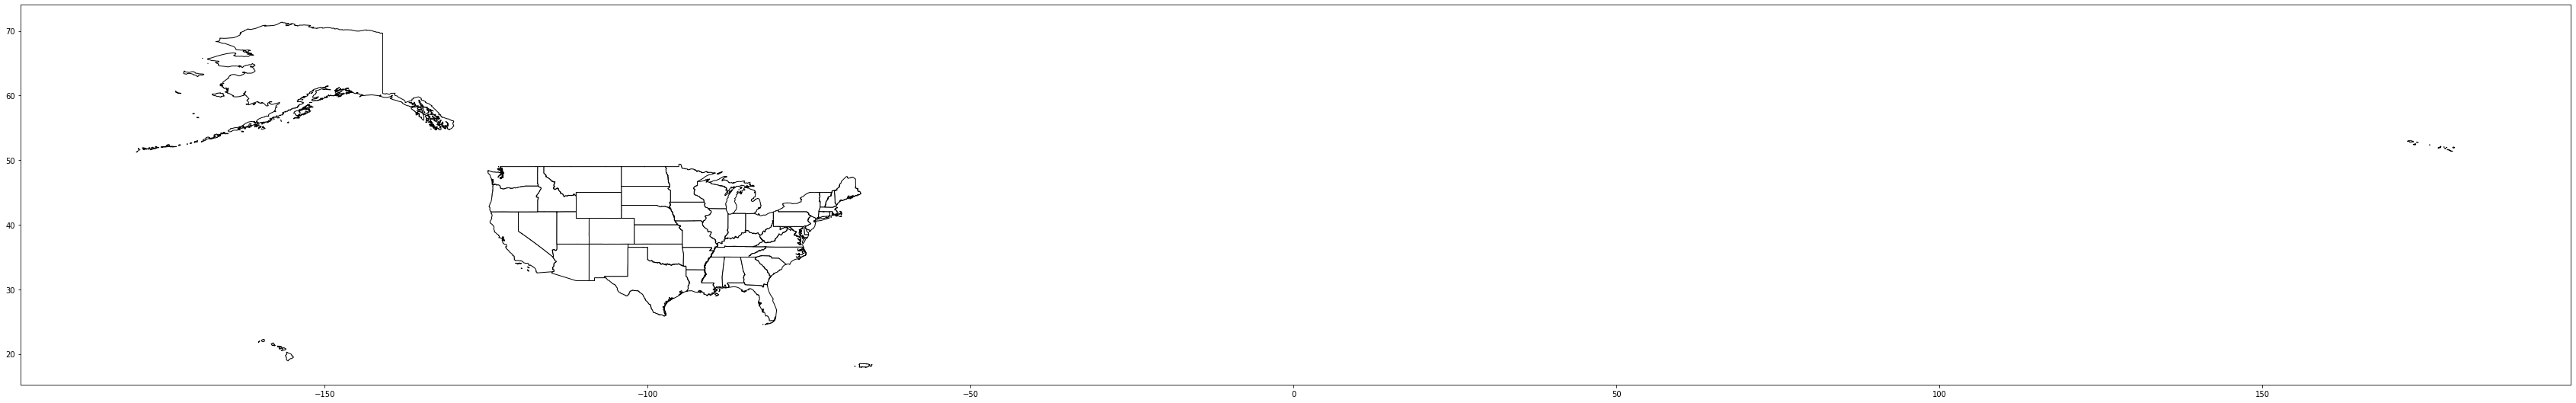

In [64]:
usa.plot(figsize=(60,40), color='white', edgecolor="black")

In [54]:
tornado_df.dtypes

OBJECTID                  int64
om                        int64
yr                        int64
mo                        int64
dy                        int64
date             datetime64[ns]
time                     object
tz                        int64
st                       object
stf                       int64
stn                       int64
mag                       int64
inj                       int64
fat                       int64
loss                    float64
closs                     int64
slat                    float64
slon                    float64
elat                    float64
elon                    float64
len                     float64
wid                       int64
fc                        int64
Pre_1996_Loss            object
Shape__Length           float64
geometry               geometry
dtype: object

In [56]:
tornado_locations_df = tornado_df.drop(['OBJECTID','om','dy','date','time','tz','inj','fat','loss','closs','fc','Pre_1996_Loss','Shape__Length'], axis=1)
tornado_locations_df.head()

,yr,mo,st,stf,stn,mag,slat,slon,elat,elon,len,wid,geometry
0,1950,1,MO,29,1,3,38.77,-90.22,38.83,-90.03,9.5,150,POINT (-90.22000 38.77000)
1,1950,1,IL,17,2,3,39.10,-89.30,39.12,-89.23,3.6,130,POINT (-89.30000 39.10000)
2,1950,1,OH,39,1,1,40.88,-84.58,0.00,0.00,0.1,10,POINT (-84.58000 40.88000)
3,1950,1,AR,5,1,3,34.40,-94.37,0.00,0.00,0.6,17,POINT (-94.37000 34.40000)
4,1950,1,MO,29,2,2,37.60,-90.68,37.63,-90.65,2.3,300,POINT (-90.68000 37.60000)


In [57]:
type(tornado_locations_df['geometry'])

pandas.core.series.Series

In [58]:
tornado_locations_gdf = geopandas.GeoDataFrame(tornado_locations_df, geometry='geometry')
tornado_locations_gdf.head()

,yr,mo,st,stf,stn,mag,slat,slon,elat,elon,len,wid,geometry
0,1950,1,MO,29,1,3,38.77,-90.22,38.83,-90.03,9.5,150,POINT (-90.22000 38.77000)
1,1950,1,IL,17,2,3,39.10,-89.30,39.12,-89.23,3.6,130,POINT (-89.30000 39.10000)
2,1950,1,OH,39,1,1,40.88,-84.58,0.00,0.00,0.1,10,POINT (-84.58000 40.88000)
3,1950,1,AR,5,1,3,34.40,-94.37,0.00,0.00,0.6,17,POINT (-94.37000 34.40000)
4,1950,1,MO,29,2,2,37.60,-90.68,37.63,-90.65,2.3,300,POINT (-90.68000 37.60000)


In [59]:
type(tornado_locations_gdf)

geopandas.geodataframe.GeoDataFrame

In [60]:
type(tornado_locations_gdf['geometry'])

geopandas.geoseries.GeoSeries

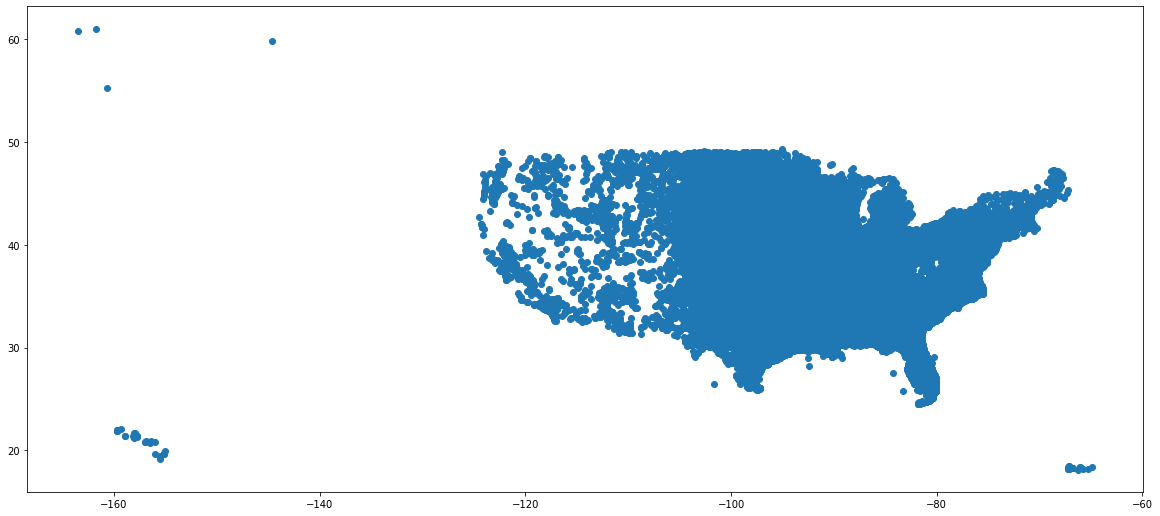

In [61]:
tornado_locations_gdf.plot(figsize=(20,10))

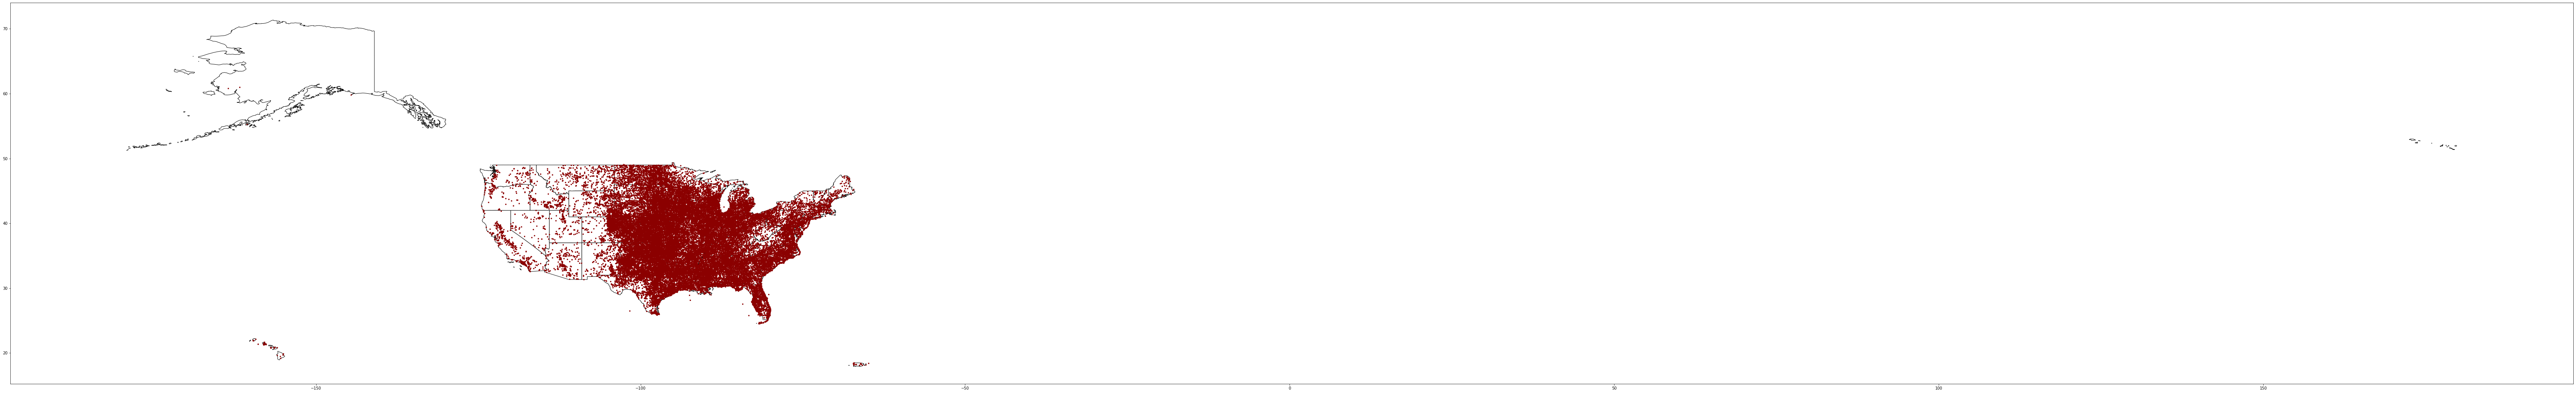

In [66]:
fig, ax = plt.subplots(1, figsize=(120,80))
base = usa.plot(ax=ax, color='white', edgecolor="black")
tornado_locations_gdf.plot(ax=base, color='darkred', marker="*", markersize=10);